# OCNC2017 STEPS Tutorial Execise

In this notebook we will try to create a STEPS simulation script from scratch by modifying the examples given in the tutorial. Please follow the tutor's instruction step by step.

## Build a biochemical model

Here is the example of a 2nd order reaction $A+B\overset{k}{\rightarrow}C$, where the reaction constant $k$ is set to 200 /uM.s:

In [1]:
# Import biochemical model module
import steps.model as smod

# Create model container
mdl = smod.Model()

# Create chemical species
A = smod.Spec('A', mdl)
B = smod.Spec('B', mdl)
C = smod.Spec('C', mdl)

# Create reaction set container
vsys = smod.Volsys('vsys', mdl)

# Create reaction
# A + B - > C with rate 200 /uM.s
reac_f = smod.Reac('reac_f', vsys, lhs=[A,B], rhs = [C])
reac_f.setKcst(200e6)

For complex model, we can break it down into elementary reactions, for example, the following model

$E+S\underset{k_{-1}}{\overset{k_{1}}{\rightleftarrows}}ES\overset{k_{2}}{\rightarrow}E+P$

is broken down into 3 reactions in STEPS

1: $E+S\overset{k_{1}}{\rightarrow}ES$

2: $ES\overset{k_{-1}}{\rightarrow}E+S$

3: $ES\overset{k_{2}}{\rightarrow}E+P$


### Execise 1: Create a kinase reaction model in STEPS

Modify the script below for this kinase reaction system:

$MEKp+ERK\underset{0.6}{\overset{16.2*10^{6}}{\rightleftarrows}}MEKpERK\overset{0.15}{\rightarrow}MEKp+ERKp$

**Hint**: Break it down in to these elementary reactions

1: $MEKp+ERK\overset{16.2*10^{6}}{\rightarrow}MEKpERK$

2: $MEKpERK\overset{0.6}{\rightarrow}MEKp+ERK$

3: $MEKpERK\overset{0.15}{\rightarrow}MEKp+ERKp$

In [2]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6

# MEKpERK -> MEKp + ERK, rate constant 0.6

# MEKpERK -> MEKp + ERKp, rate constant 0.15


## Setup geometry

You can easily setup the geometry of a well-mixed model by providing the volume of the geometry as well as the voume system it associated with.

In [3]:
# Import geometry module
import steps.geom as sgeom

# Create well-mixed geometry container
wmgeom = sgeom.Geom()

# Create cytosol compartment
cyt = sgeom.Comp('cyt', wmgeom)

# Give volume to cyt (1um^3)
cyt.setVol(1.0e-18)

# Assign reaction set to compartment
cyt.addVolsys('vsys')

## Create a random number generator

You can use the follow code to create a random number generator for the simulation, currently available generators are "mt19937" and "r123".

In [4]:
# Import random number generator module
import steps.rng as srng

# Create random number generator, with buffer size as 256
r = srng.create('mt19937', 256)

# Initialise with some seed
r.initialize(899)

# Could use time to get random seed
#import time
#r.initialize(int(time.time()))

### Execise 2: Create the geometry and random number generator for the kinase reaction model
    
Let's continue our kinase reaction simulation script, here are the tasks:
1. Create a compartment of $0.1um^{3}$ (note that STEPS uses S.I units)
2. Associate the compartment with the volume system we've previously created
3. Create a "r123" random number generator and initialize it with with some seed

In [5]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6
MEKp_ERK_to_MEKpERK = smod.Reac('MEKp_ERK_to_MEKpERK', execise_vsys, lhs=[MEKp,ERK], rhs = [MEKpERK])
MEKp_ERK_to_MEKpERK.setKcst(16.2e6)
# MEKpERK -> MEKp + ERK, rate constant 0.6
MEKpERK_to_MEKp_ERK = smod.Reac('MEKpERK_to_MEKp_ERK', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERK])
MEKpERK_to_MEKp_ERK.setKcst(0.6)
# MEKpERK -> MEKp + ERKp, rate constant 0.15
MEKpERK_to_MEKp_ERKp = smod.Reac('MEKpERK_to_MEKp_ERKp', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERKp])
MEKpERK_to_MEKp_ERKp.setKcst(0.15)

####### You script after execise 1 should look like above #######

# Create a compartment of  0.1um^3

# Associate the compartment with the volume system 'vsys'

# Create and initialize a 'r123' random number generator


## Create and initialize a solver

For well-mixed simulation, we create a "wmdirect" solver and initialize it by adding molecules to the compartment. 

In [6]:
# Import solver module
import steps.solver as ssolv

# Create Well-mixed Direct solver
sim_direct = ssolv.Wmdirect(mdl, wmgeom, r)

# Inject 10 ‘A’ molecules
sim_direct.setCompCount('cyt','A', 10)

# Set concentration of ‘B’ molecules
sim_direct.setCompConc('cyt', 'B', 0.0332e-6)

## Run the solver and gather simulation data
After that we can run the solver until it reaches a specific time point, say 0.1 second. You can gather simulation data such as molecule counts using many STEPS APIs, for example

In [7]:
# Run simulation for 0.1s
sim_direct.run(0.1)

# Return the number of A molecules
sim_direct.getCompCount('cyt', 'A')

6.0

In practice, it is often necessary to store simulation data in a numpy array or a file for plotting or further analysis. For example, here we record the number of molcules using numpy array.

In [8]:
# Reset the solver and reinitizlize molecule counts

sim_direct.reset()

# Inject 10 ‘A’ molecules
sim_direct.setCompCount('cyt','A', 10)

# Set concentration of ‘B’ molecules
sim_direct.setCompConc('cyt', 'B', 0.0332e-6)

In [9]:
# Import numpy
import numpy as np

# Create time-point numpy array, starting at time 0, end at 0.5 second and record data every 0.001 second
tpnt = np.arange(0.0, 0.501, 0.001)

# Calculate number of time points
n_tpnts = len(tpnt)

# Create data array, initialised with zeros
res_direct = np.zeros([n_tpnts, 3])

# Run simulation and record data
for t in range(0, n_tpnts):
    sim_direct.run(tpnt[t])
    res_direct[t,0] = sim_direct.getCompCount('cyt','A')
    res_direct[t,1] = sim_direct.getCompCount('cyt','B')
    res_direct[t,2] = sim_direct.getCompCount('cyt','C')

Let's check what is inside the array now:

In [10]:
print(res_direct)

[[ 10.  20.   0.]
 [ 10.  20.   0.]
 [ 10.  20.   0.]
 ..., 
 [  2.  12.   8.]
 [  2.  12.   8.]
 [  2.  12.   8.]]


### Execise 3: Run your kinase model in STEPS
Here are the tasks:
1. Create a "wmdirect" solver and set the initial condition:
    * MEKp = 1uM
    * ERK = 1.5uM
2. Run the simulation for 30 seconds, record concerntrations of each molecule every 0.01 seconds.

In [11]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6
MEKp_ERK_to_MEKpERK = smod.Reac('MEKp_ERK_to_MEKpERK', execise_vsys, lhs=[MEKp,ERK], rhs = [MEKpERK])
MEKp_ERK_to_MEKpERK.setKcst(16.2e6)
# MEKpERK -> MEKp + ERK, rate constant 0.6
MEKpERK_to_MEKp_ERK = smod.Reac('MEKpERK_to_MEKp_ERK', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERK])
MEKpERK_to_MEKp_ERK.setKcst(0.6)
# MEKpERK -> MEKp + ERKp, rate constant 0.15
MEKpERK_to_MEKp_ERKp = smod.Reac('MEKpERK_to_MEKp_ERKp', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERKp])
MEKpERK_to_MEKp_ERKp.setKcst(0.15)

####### You script after execise 1 should look like above #######

# Create a compartment of  0.1um^3
import steps.geom as sgeom
execise_wmgeom = sgeom.Geom()
execise_cyt = sgeom.Comp('execise_cyt', execise_wmgeom)
execise_cyt.setVol(0.1e-18)

# Associate the compartment with the volume system 'vsys'
execise_cyt.addVolsys('execise_vsys')

# Create and initialize a 'r123' random number generator
import steps.rng as srng
execise_r = srng.create('r123', 256)
execise_r.initialize(1)

####### You script after execise 2 should look like above #######

# Create a "wmdirect" solver and set the initial condition:
# MEKp = 1uM
# ERK = 1.5uM


# Run the simulation for 30 seconds, record concerntrations of each molecule every 0.01 seconds.


## Visuzalize simulation data

Visuzliation is often needed to analyze the behavior of the simulation, here we use Matplotlib to plot the data.

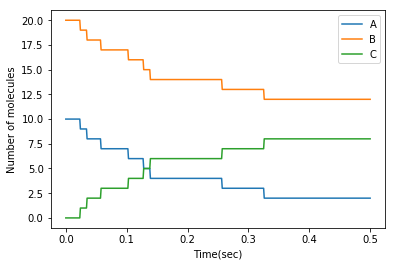

In [12]:
from pylab import *
%matplotlib inline
plot(tpnt, res_direct[:,0], label='A')
plot(tpnt, res_direct[:,1], label='B')
plot(tpnt, res_direct[:,2], label='C')
ylabel('Number of molecules')
xlabel('Time(sec)')
legend()
show()

### Execise 4: Plot the results of the kinase simulation
Let's now plot the result of our execise.

In [13]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6
MEKp_ERK_to_MEKpERK = smod.Reac('MEKp_ERK_to_MEKpERK', execise_vsys, lhs=[MEKp,ERK], rhs = [MEKpERK])
MEKp_ERK_to_MEKpERK.setKcst(16.2e6)
# MEKpERK -> MEKp + ERK, rate constant 0.6
MEKpERK_to_MEKp_ERK = smod.Reac('MEKpERK_to_MEKp_ERK', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERK])
MEKpERK_to_MEKp_ERK.setKcst(0.6)
# MEKpERK -> MEKp + ERKp, rate constant 0.15
MEKpERK_to_MEKp_ERKp = smod.Reac('MEKpERK_to_MEKp_ERKp', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERKp])
MEKpERK_to_MEKp_ERKp.setKcst(0.15)

####### You script after execise 1 should look like above #######

# Create a compartment of  0.1um^3
import steps.geom as sgeom
execise_wmgeom = sgeom.Geom()
execise_cyt = sgeom.Comp('execise_cyt', execise_wmgeom)
execise_cyt.setVol(0.1e-18)

# Associate the compartment with the volume system 'vsys'
execise_cyt.addVolsys('execise_vsys')

# Create and initialize a 'r123' random number generator
import steps.rng as srng
execise_r = srng.create('r123', 256)
execise_r.initialize(143)

####### You script after execise 2 should look like above #######

# Create a "wmdirect" solver and set the initial condition:
# MEKp = 1uM
# ERK = 1.5uM
import steps.solver as ssolv
execise_sim = ssolv.Wmdirect(execise_mdl, execise_wmgeom, execise_r)
execise_sim.setCompConc('execise_cyt','MEKp', 1e-6)
execise_sim.setCompConc('execise_cyt','ERK', 1.5e-6)

# Run the simulation for 30 seconds, record concerntrations of each molecule every 0.01 seconds.
import numpy as np
execise_tpnts = np.arange(0.0, 30.01, 0.01)
n_tpnts = len(execise_tpnts)
execise_res = np.zeros([n_tpnts, 4])

# Run simulation and record data
for t in range(0, n_tpnts):
    execise_sim.run(execise_tpnts[t])
    execise_res[t,0] = execise_sim.getCompCount('execise_cyt','MEKp')
    execise_res[t,1] = execise_sim.getCompCount('execise_cyt','ERK')
    execise_res[t,2] = execise_sim.getCompCount('execise_cyt','MEKpERK')
    execise_res[t,3] = execise_sim.getCompCount('execise_cyt','ERKp')

####### You script after execise 3 should look like above #######

# Plot execise_res

Here is the complete script for our well-mixed kinase simulation:

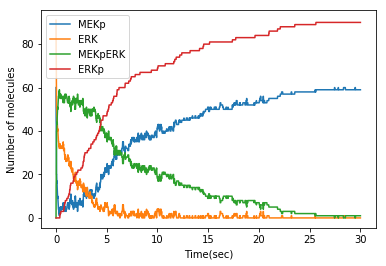

In [14]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6
MEKp_ERK_to_MEKpERK = smod.Reac('MEKp_ERK_to_MEKpERK', execise_vsys, lhs=[MEKp,ERK], rhs = [MEKpERK])
MEKp_ERK_to_MEKpERK.setKcst(16.2e6)
# MEKpERK -> MEKp + ERK, rate constant 0.6
MEKpERK_to_MEKp_ERK = smod.Reac('MEKpERK_to_MEKp_ERK', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERK])
MEKpERK_to_MEKp_ERK.setKcst(0.6)
# MEKpERK -> MEKp + ERKp, rate constant 0.15
MEKpERK_to_MEKp_ERKp = smod.Reac('MEKpERK_to_MEKp_ERKp', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERKp])
MEKpERK_to_MEKp_ERKp.setKcst(0.15)

####### You script after execise 1 should look like above #######

# Create a compartment of  0.1um^3
import steps.geom as sgeom
execise_wmgeom = sgeom.Geom()
execise_cyt = sgeom.Comp('execise_cyt', execise_wmgeom)
execise_cyt.setVol(0.1e-18)

# Associate the compartment with the volume system 'vsys'
execise_cyt.addVolsys('execise_vsys')

# Create and initialize a 'r123' random number generator
import steps.rng as srng
execise_r = srng.create('r123', 256)
execise_r.initialize(143)

####### You script after execise 2 should look like above #######

# Create a "wmdirect" solver and set the initial condition:
# MEKp = 1uM
# ERK = 1.5uM
import steps.solver as ssolv
execise_sim = ssolv.Wmdirect(execise_mdl, execise_wmgeom, execise_r)
execise_sim.setCompConc('execise_cyt','MEKp', 1e-6)
execise_sim.setCompConc('execise_cyt','ERK', 1.5e-6)

# Run the simulation for 30 seconds, record concerntrations of each molecule every 0.01 seconds.
import numpy as np
execise_tpnts = np.arange(0.0, 30.01, 0.01)
n_tpnts = len(execise_tpnts)
execise_res = np.zeros([n_tpnts, 4])

# Run simulation and record data
for t in range(0, n_tpnts):
    execise_sim.run(execise_tpnts[t])
    execise_res[t,0] = execise_sim.getCompCount('execise_cyt','MEKp')
    execise_res[t,1] = execise_sim.getCompCount('execise_cyt','ERK')
    execise_res[t,2] = execise_sim.getCompCount('execise_cyt','MEKpERK')
    execise_res[t,3] = execise_sim.getCompCount('execise_cyt','ERKp')

####### You script after execise 3 should look like above #######

# Plot execise_res
from pylab import *
plot(execise_tpnts, execise_res[:,0], label='MEKp')
plot(execise_tpnts, execise_res[:,1], label='ERK')
plot(execise_tpnts, execise_res[:,2], label='MEKpERK')
plot(execise_tpnts, execise_res[:,3], label='ERKp')
ylabel('Number of molecules')
xlabel('Time(sec)')
legend()
show()

####### You script after execise 4 should look like above #######

## From well-mixed simulation to spatial simulation

To convert a well-mixed simulation to a spatial one, here are the basic steps:
1. Add diffusion rules for every diffusive species in the biochemical model.
2. Change the well-mixed geoemtry to a tetrahedral mesh.
3. Change the solver to "Tetexact".

First, let's see how to add diffusion rules in our example well-mixed model:

In [15]:
# Import biochemical model module
import steps.model as smod

# Create model container
mdl = smod.Model()

# Create chemical species
A = smod.Spec('A', mdl)
B = smod.Spec('B', mdl)
C = smod.Spec('C', mdl)

# Create reaction set container
vsys = smod.Volsys('vsys', mdl)

# Create reaction
# A + B - > C with rate 200 /uM.s
reac_f = smod.Reac('reac_f', vsys, lhs=[A,B], rhs = [C])
reac_f.setKcst(200e6)

###### Above is the previous well-mixed biochemical model

# We add diffusion rules for species A, B and C
diff_a = smod.Diff('diff_a', vsys, A)
diff_a.setDcst(0.02e-9)
diff_b = smod.Diff('diff_b', vsys, B)
diff_b.setDcst(0.02e-9)
diff_c = smod.Diff('diff_c', vsys, C)
diff_c.setDcst(0.02e-9)


We now import a tetrahedral mesh using the steps.utilities.meshio module to replace the well-mixed geometry:

In [16]:
'''
# Import geometry module
import steps.geom as sgeom

# Create well-mixed geometry container
wmgeom = sgeom.Geom()

# Create cytosol compartment
cyt = sgeom.Comp('cyt', wmgeom)

# Give volume to cyt (1um^3)
cyt.setVol(1.0e-18)

# Assign reaction set to compartment
cyt.addVolsys('vsys')

'''

##### above is the old well-mixed geometry ##########

import steps.geom as sgeom
import steps.utilities.meshio as meshio

# Import the mesh
mesh = meshio.importAbaqus('meshes/1x1x1_cube.inp', 1.0e-6)[0]

# Create mesh-based compartment
cyt = sgeom.TmComp('cyt', mesh, range(mesh.ntets))

# Add volume system to the compartment
cyt.addVolsys('vsys')

Reading Abaqus file...
Number of nodes imported:  1841
Number of tetrahedrons imported:  8828
Number of triangles imported:  0
creating Tetmesh object in STEPS...
Tetmesh object created.


Finally, we replace the "Wmdirect" solver with the spatial "Tetexact" solver:

In [17]:
# Import solver module
import steps.solver as ssolv

'''
# Create Well-mixed Direct solver
sim_direct = ssolv.Wmdirect(mdl, wmgeom, r)
'''

##### above is the old well-mixed Wmdirect solver ##########

# Create a spatial Tetexact solver
sim_tetexact = ssolv.Tetexact(mdl, mesh, r)

The "Wmdirect" solver and the "Tetexact" solver share most of the APIs, so we can reuse our old script for simulation control and plotting:

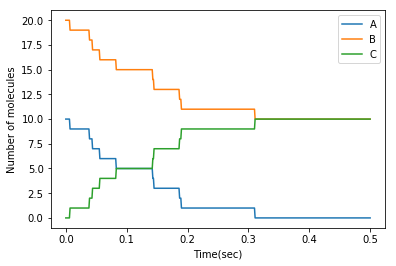

In [18]:
# Inject 10 ‘A’ molecules
sim_tetexact.setCompCount('cyt','A', 10)

# Set concentration of ‘B’ molecules
sim_tetexact.setCompConc('cyt', 'B', 0.0332e-6)

# Import numpy
import numpy as np

# Create time-point numpy array, starting at time 0, end at 0.5 second and record data every 0.001 second
tpnt = np.arange(0.0, 0.501, 0.001)

# Calculate number of time points
n_tpnts = len(tpnt)

# Create data array, initialised with zeros
res_tetexact = np.zeros([n_tpnts, 3])

# Run simulation and record data
for t in range(0, n_tpnts):
    sim_tetexact.run(tpnt[t])
    res_tetexact[t,0] = sim_tetexact.getCompCount('cyt','A')
    res_tetexact[t,1] = sim_tetexact.getCompCount('cyt','B')
    res_tetexact[t,2] = sim_tetexact.getCompCount('cyt','C')
    
from pylab import *
plot(tpnt, res_tetexact[:,0], label='A')
plot(tpnt, res_tetexact[:,1], label='B')
plot(tpnt, res_tetexact[:,2], label='C')
ylabel('Number of molecules')
xlabel('Time(sec)')
legend()
show()

# Execise 5: Modify your well-mixed kinase simulation to a spatial one

Let's now convert the below well-mixed kinase model to a spatial one, here are the tasks:

1. Add diffusion constants:
    * MEKp = 30e-12 $m^2/s$
    * ERK = 30e-12 $m^2/s$
    * MEKpERK = 10e-12 $m^2/s$
2. Replace the geometry to use mesh 'meshes/sp_0.1v_1046.inp'
3. Change the solver to Tetexact
4. Run the simulation again

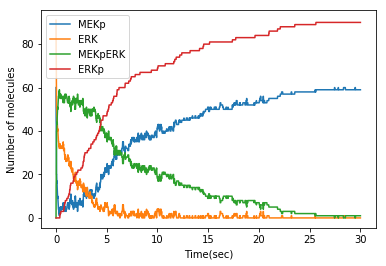

In [19]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6
MEKp_ERK_to_MEKpERK = smod.Reac('MEKp_ERK_to_MEKpERK', execise_vsys, lhs=[MEKp,ERK], rhs = [MEKpERK])
MEKp_ERK_to_MEKpERK.setKcst(16.2e6)
# MEKpERK -> MEKp + ERK, rate constant 0.6
MEKpERK_to_MEKp_ERK = smod.Reac('MEKpERK_to_MEKp_ERK', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERK])
MEKpERK_to_MEKp_ERK.setKcst(0.6)
# MEKpERK -> MEKp + ERKp, rate constant 0.15
MEKpERK_to_MEKp_ERKp = smod.Reac('MEKpERK_to_MEKp_ERKp', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERKp])
MEKpERK_to_MEKp_ERKp.setKcst(0.15)

########### execise 5.1: Add diffusion constants

#    * MEKp = 30e-12 m^2/s
#    * ERK = 30e-12 m^2/s
#    * MEKpERK = 10e-12 m^2/s


####### You script after execise 1 should look like above #######

########### execise 5.2: Replace the geometry to use mesh 'meshes/sp_0.1v_1046.inp'

# Create a compartment of  0.1um^3
import steps.geom as sgeom
execise_wmgeom = sgeom.Geom()
execise_cyt = sgeom.Comp('execise_cyt', execise_wmgeom)
execise_cyt.setVol(0.1e-18)

# Associate the compartment with the volume system 'vsys'
execise_cyt.addVolsys('execise_vsys')

# Create and initialize a 'r123' random number generator
import steps.rng as srng
execise_r = srng.create('r123', 256)
execise_r.initialize(143)

####### You script after execise 2 should look like above #######

# Create a "wmdirect" solver and set the initial condition:
# MEKp = 1uM
# ERK = 1.5uM
import steps.solver as ssolv

########### execise 5.3: Change the solver to Tetexact
execise_sim = ssolv.Wmdirect(execise_mdl, execise_wmgeom, execise_r)

execise_sim.setCompConc('execise_cyt','MEKp', 1e-6)
execise_sim.setCompConc('execise_cyt','ERK', 1.5e-6)

# Run the simulation for 30 seconds, record concerntrations of each molecule every 0.01 seconds.
import numpy as np
execise_tpnts = np.arange(0.0, 30.01, 0.01)
n_tpnts = len(execise_tpnts)
execise_res = np.zeros([n_tpnts, 4])

# Run simulation and record data
for t in range(0, n_tpnts):
    execise_sim.run(execise_tpnts[t])
    execise_res[t,0] = execise_sim.getCompCount('execise_cyt','MEKp')
    execise_res[t,1] = execise_sim.getCompCount('execise_cyt','ERK')
    execise_res[t,2] = execise_sim.getCompCount('execise_cyt','MEKpERK')
    execise_res[t,3] = execise_sim.getCompCount('execise_cyt','ERKp')

####### You script after execise 3 should look like above #######

# Plot execise_res
from pylab import *
plot(execise_tpnts, execise_res[:,0], label='MEKp')
plot(execise_tpnts, execise_res[:,1], label='ERK')
plot(execise_tpnts, execise_res[:,2], label='MEKpERK')
plot(execise_tpnts, execise_res[:,3], label='ERKp')
ylabel('Number of molecules')
xlabel('Time(sec)')
legend()
show()

####### You script after execise 4 should look like above #######

Here is the modified script

Reading Abaqus file...
Number of nodes imported:  247
Number of tetrahedrons imported:  1046
Number of triangles imported:  0
creating Tetmesh object in STEPS...
Tetmesh object created.


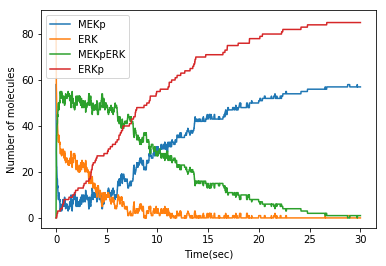

In [20]:
# Import biochemical model module
import steps.model as smod

# Create model container
execise_mdl = smod.Model()

# Create chemical species
MEKp = smod.Spec('MEKp', execise_mdl)
ERK = smod.Spec('ERK', execise_mdl)
MEKpERK = smod.Spec('MEKpERK', execise_mdl)
ERKp = smod.Spec('ERKp', execise_mdl)

# Create reaction set container (volume system)
execise_vsys = smod.Volsys('execise_vsys', execise_mdl)

# Create reactions (Do it yourself)
# MEKp + ERK -> MEKpERK, rate constant 16.2*10e6
MEKp_ERK_to_MEKpERK = smod.Reac('MEKp_ERK_to_MEKpERK', execise_vsys, lhs=[MEKp,ERK], rhs = [MEKpERK])
MEKp_ERK_to_MEKpERK.setKcst(16.2e6)
# MEKpERK -> MEKp + ERK, rate constant 0.6
MEKpERK_to_MEKp_ERK = smod.Reac('MEKpERK_to_MEKp_ERK', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERK])
MEKpERK_to_MEKp_ERK.setKcst(0.6)
# MEKpERK -> MEKp + ERKp, rate constant 0.15
MEKpERK_to_MEKp_ERKp = smod.Reac('MEKpERK_to_MEKp_ERKp', execise_vsys, lhs = [MEKpERK], rhs=[MEKp,ERKp])
MEKpERK_to_MEKp_ERKp.setKcst(0.15)

########### execise 5.1: Add diffusion constants

#    * MEKp = 30e-12 m^2/s
#    * ERK = 30e-12 m^2/s
#    * MEKpERK = 10e-12 m^2/s

diff_MEKp = smod.Diff('diff_MEKp', execise_vsys, MEKp)
diff_MEKp.setDcst(30e-12)
diff_ERK = smod.Diff('diff_ERK', execise_vsys, ERK)
diff_ERK.setDcst(30e-12)
diff_MEKpERK = smod.Diff('diff_MEKpERK', execise_vsys, MEKpERK)
diff_MEKpERK.setDcst(10e-12)

####### You script after execise 1 should look like above #######

########### execise 5.2: Replace the geometry to use mesh 'meshes/sp_0.1v_1046.inp'
import steps.geom as sgeom
import steps.utilities.meshio as meshio

mesh = meshio.importAbaqus('meshes/sp_0.1v_1046.inp', 1.0e-6)[0]
execise_cyt = sgeom.TmComp('execise_cyt', mesh, range(mesh.ntets))
execise_cyt.addVolsys('execise_vsys')

# Create and initialize a 'r123' random number generator
import steps.rng as srng
execise_r = srng.create('r123', 256)
execise_r.initialize(143)

####### You script after execise 2 should look like above #######

# Create a "wmdirect" solver and set the initial condition:
# MEKp = 1uM
# ERK = 1.5uM
import steps.solver as ssolv

########### execise 5.3: Change the solver to Tetexact
execise_sim = ssolv.Tetexact(execise_mdl, mesh, execise_r)

execise_sim.setCompConc('execise_cyt','MEKp', 1e-6)
execise_sim.setCompConc('execise_cyt','ERK', 1.5e-6)

# Run the simulation for 30 seconds, record concerntrations of each molecule every 0.01 seconds.
import numpy as np
execise_tpnts = np.arange(0.0, 30.01, 0.01)
n_tpnts = len(execise_tpnts)
execise_res = np.zeros([n_tpnts, 4])

# Run simulation and record data
for t in range(0, n_tpnts):
    execise_sim.run(execise_tpnts[t])
    execise_res[t,0] = execise_sim.getCompCount('execise_cyt','MEKp')
    execise_res[t,1] = execise_sim.getCompCount('execise_cyt','ERK')
    execise_res[t,2] = execise_sim.getCompCount('execise_cyt','MEKpERK')
    execise_res[t,3] = execise_sim.getCompCount('execise_cyt','ERKp')

####### You script after execise 3 should look like above #######

# Plot execise_res
from pylab import *
plot(execise_tpnts, execise_res[:,0], label='MEKp')
plot(execise_tpnts, execise_res[:,1], label='ERK')
plot(execise_tpnts, execise_res[:,2], label='MEKpERK')
plot(execise_tpnts, execise_res[:,3], label='ERKp')
ylabel('Number of molecules')
xlabel('Time(sec)')
legend()
show()

####### You script after execise 4 should look like above #######